In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf 
from tensorflow import keras

In [24]:
import matplotlib.pyplot as plt

Carregar dados

In [2]:
cifar10 = keras.datasets.cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 9s 0us/step


In [7]:
x_train[0].shape

(32, 32, 3)

In [12]:
x_train[0][0][1] #primeiro pixel e segundo pixel

array([43, 46, 45], dtype=uint8)

In [13]:
y_train.shape

(50000, 1)

In [14]:
y_test.shape

(10000, 1)

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
import numpy as np 
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

In [17]:
contagem = tuple(zip(*np.unique(y_train,return_counts=True)))
contagem

((0, 5000),
 (1, 5000),
 (2, 5000),
 (3, 5000),
 (4, 5000),
 (5, 5000),
 (6, 5000),
 (7, 5000),
 (8, 5000),
 (9, 5000))

In [19]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

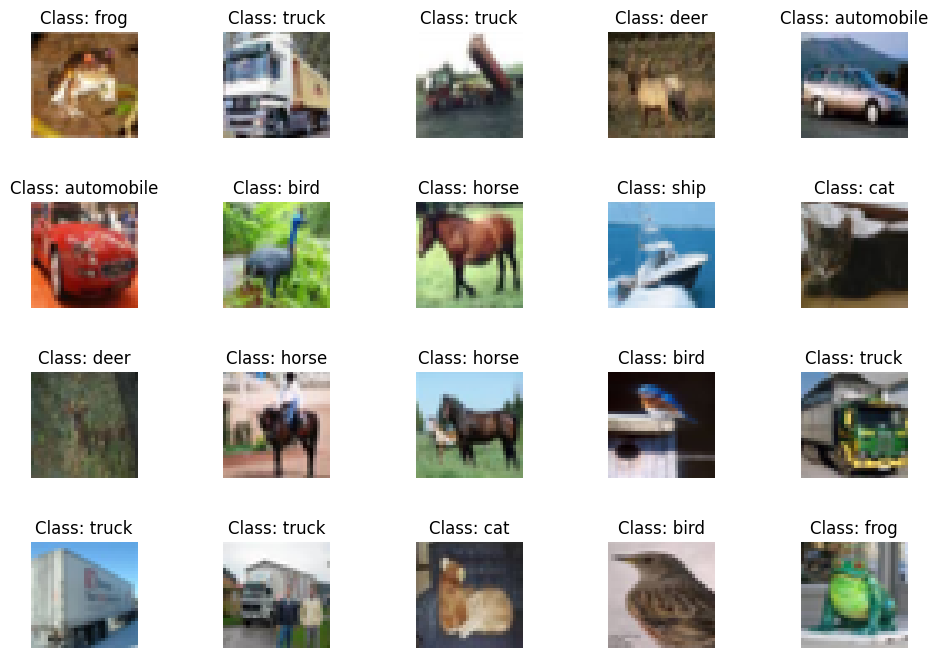

In [28]:
fig, axs = plt.subplots(4,5, figsize=(12,8)) #4 é o número de linhas e 5 o número de colunas

for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i])
    ax.set_title(f"Class: {class_names[y_train[i][0]]}")
    ax.axis("off")

fig.subplots_adjust(hspace=0.60)    
plt.show()

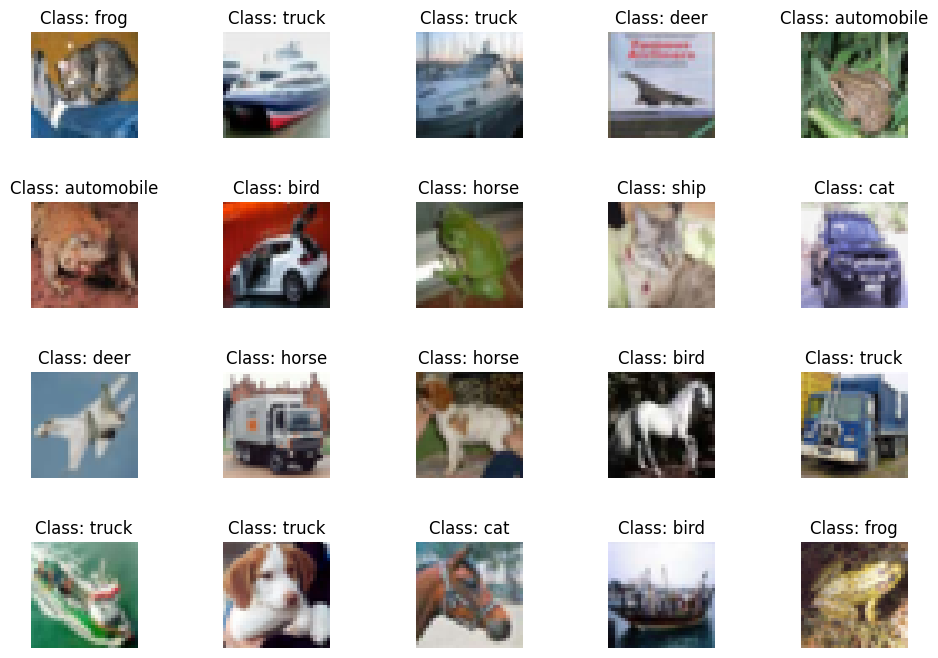

In [29]:
fig, axs = plt.subplots(4,5, figsize=(12,8))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_test[i])
    ax.set_title(f"Class: {class_names[y_train[i][0]]}")
    ax.axis("off")

fig.subplots_adjust(hspace=0.60)    
plt.show()

Definir Modelo

In [30]:
model = keras.models.Sequential()

model.add(keras.layers.InputLayer(input_shape=(32, 32, 3)))

model.add(keras.layers.Rescaling(scale=1./255))

#model.add(keras.layers.RandomRotation(0.1))
#model.add(keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1))
#model.add(keras.layers.RandomZoom(0.1))

model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D())
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D())
#model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4608)             

In [31]:
opt = keras.optimizers.Adam(learning_rate=1E-3)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()

model.compile(
    optimizer= opt, 
    loss=loss, 
    metrics=[metric]
)

Fit do Modelo Keras

In [32]:
early_stop = keras.callbacks.EarlyStopping(
    patience=5,
    verbose=1,
    min_delta=1E-4,
)

history = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=256,
    validation_split=0.2,
    callbacks= [early_stop],
)

Epoch 1/100

157/157 [==============================] - 36s 221ms/step - loss: 1.7067 - sparse_categorical_accuracy: 0.3884 - val_loss: 1.4496 - val_sparse_categorical_accuracy: 0.4909
Epoch 2/100
157/157 [==============================] - 35s 221ms/step - loss: 1.3479 - sparse_categorical_accuracy: 0.5260 - val_loss: 1.2743 - val_sparse_categorical_accuracy: 0.5611
Epoch 3/100
157/157 [==============================] - 27s 169ms/step - loss: 1.2148 - sparse_categorical_accuracy: 0.5758 - val_loss: 1.2964 - val_sparse_categorical_accuracy: 0.5491
Epoch 4/100
157/157 [==============================] - 25s 158ms/step - loss: 1.1274 - sparse_categorical_accuracy: 0.6087 - val_loss: 1.1367 - val_sparse_categorical_accuracy: 0.6093
Epoch 5/100
157/157 [==============================] - 25s 157ms/step - loss: 1.0623 - sparse_categorical_accuracy: 0.6317 - val_loss: 1.1235 - val_sparse_categorical_accuracy: 0.6137
Epoch 6/100
157/157 [==============================] - 25s 158ms/step - loss: 1

Evaluate

In [33]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9336 - sparse_categorical_accuracy: 0.6976


[0.9336119890213013, 0.6976000070571899]

Predict

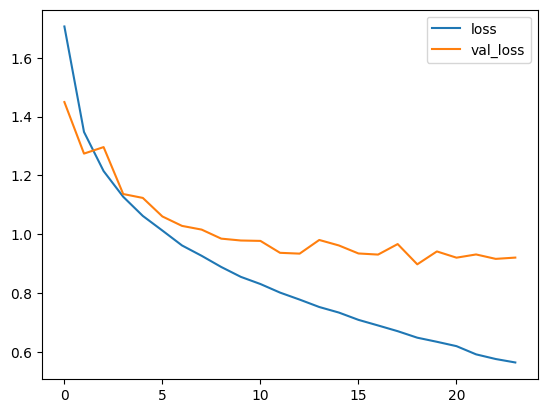

In [34]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

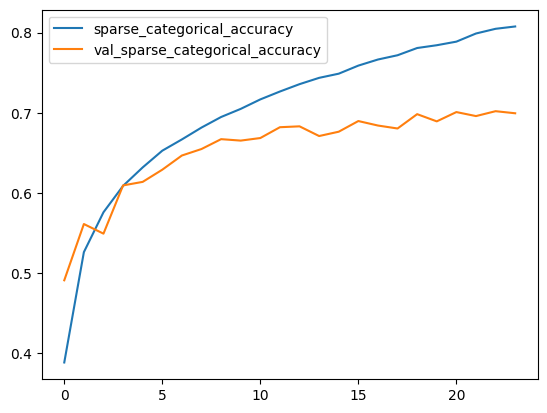

In [35]:
plt.plot(history.history["sparse_categorical_accuracy"], label="sparse_categorical_accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], label="val_sparse_categorical_accuracy")
plt.legend()
plt.show()

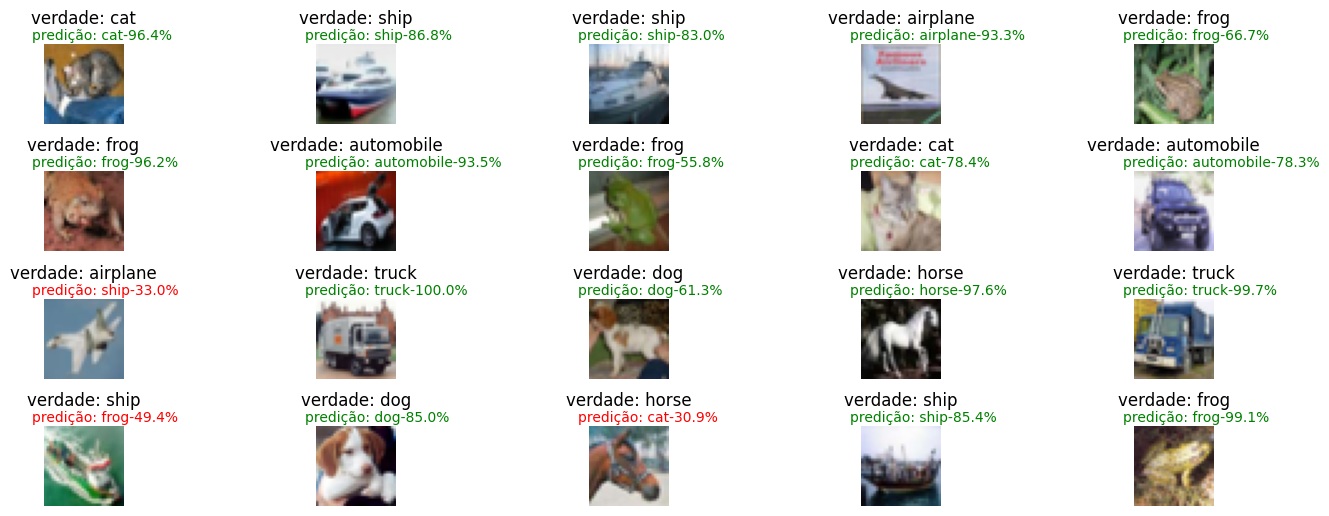

In [39]:
fig, axs = plt.subplots(4,5, figsize=(17,6)) #4 é o número de linhas e 5 o número de colunas

for i, ax in enumerate(axs.flat):
    ax.imshow(x_test[i], cmap='gray')
    pred = model.predict(np.expand_dims(x_test[i], axis=0), verbose=0)[0]
    ax.set_title(f"verdade: {class_names[y_test[i][0]]}", pad=15) #pad é para espaçar
    ax.axis("off")
    ax.text(
        -5,
        -2.5,
        f"predição: {class_names[pred.argmax()]}-{pred.max():.1%}",
        color="green" if pred.argmax() == y_test[i] else "red"
    )
fig.subplots_adjust(hspace=0.60) 
plt.show()

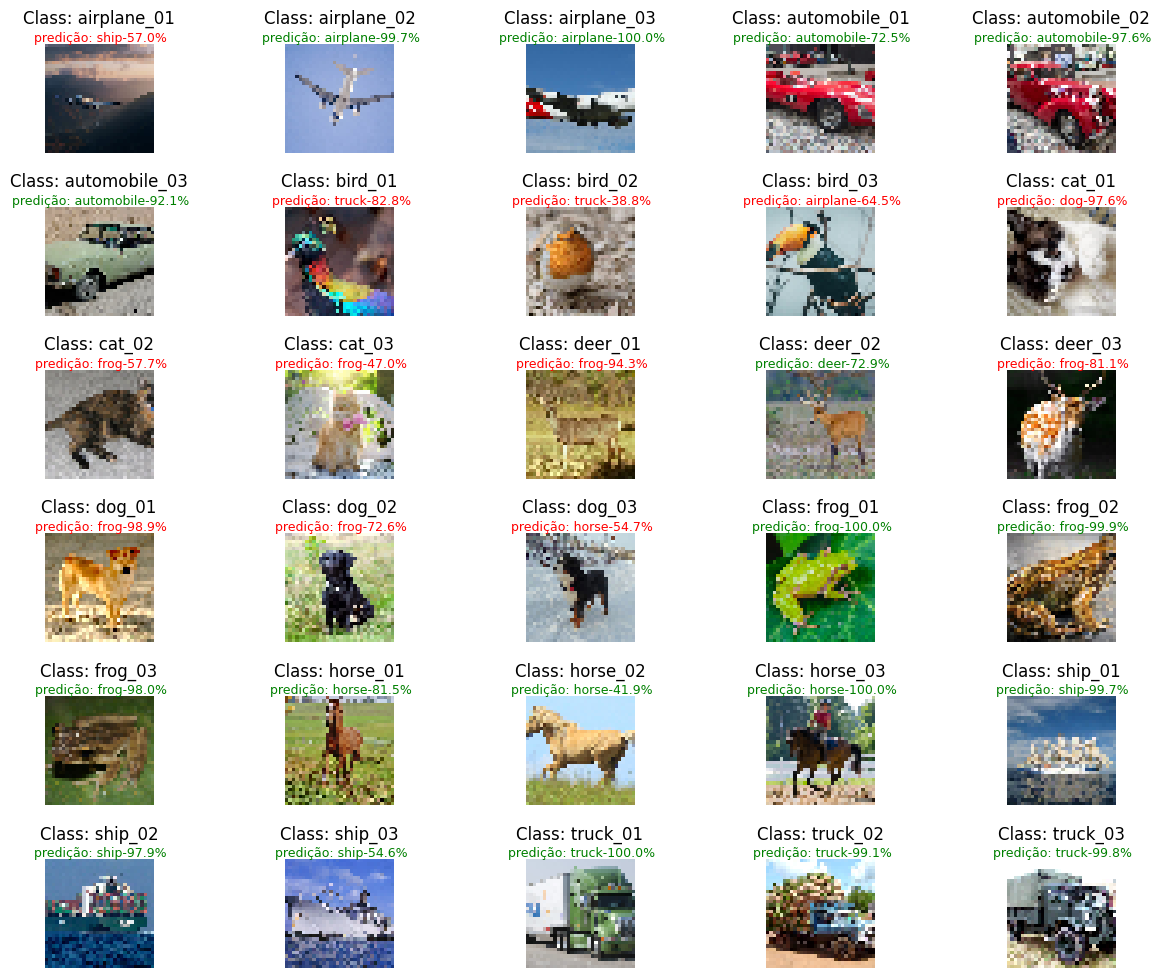

Acertos: 18 de 30 - 60.0%


In [55]:
from pathlib import Path

test_images_dir = Path(r"C:\Users\User\Desktop\CienciadeDados\CursoHashtag\Deeplearning\Projeto_CIFAR-10\test_images")

fig, axs = plt.subplots(6, 5, figsize=(15,12))

all_pred = {}

numero_acertos = 0

for i, (img, ax) in enumerate(zip(sorted(test_images_dir.glob("*.jpg")), axs.flat)):
    name = img.name.split(".")[0] #Pegando o nome que veio antes do .jpg
    
    #Processamento de imagem de predição
    img = keras.preprocessing.image.load_img(
        img, target_size=(32,32), color_mode="rgb", keep_aspect_ratio=True
    )

    #É necessário transformar o processamento de imagem em um array
    img_array = keras.preprocessing.image.img_to_array(img, dtype=np.uint8)
    img_array = tf.expand_dims(img_array, 0)
    
    pred = model.predict(img_array, verbose=0)
    all_pred[name] = pred
    
    ax.imshow(img_array[0])
    ax.set_title(f"Class: {name}", pad=15) #pad é para espaçar
    ax.axis("off")



    ax.text(
        16,
        -2.5,
        f"predição: {class_names[pred.argmax()]}-{pred.max():.1%}",
        color="green" if pred.argmax() == class_names.index(name.split("_")[0]) else "red",
        verticalalignment="center",
        horizontalalignment="center",
        fontsize=9
    )

    if pred.argmax() == class_names.index(name.split("_")[0]):
        numero_acertos += 1

fig.subplots_adjust(hspace=0.5) 
plt.show()

print(f"Acertos: {numero_acertos} de {len(all_pred)} - {(numero_acertos/len(all_pred)):.1%}")